In [60]:
import pandas as pd 
import geopandas as gpd
import os 
import json 
parent_dir = os.path.dirname(os.getcwd())

In [61]:
relativ_centroids = r'auxilary\centroids_mappedheight_names.csv' 
path_centroid = os.path.join(parent_dir, relativ_centroids)
relativ_shape = r'CEA_model\2030_Baseline\inputs\building-geometry\zone.shp'
path_shape = os.path.join(parent_dir, relativ_shape)

In [62]:
# put the path to your dt project here 
path_dt_project = r'C:\Users\felix\Programmieren\UBEM_deckgl'

In [63]:
gdf_shape = gpd.read_file(path_shape)
gdf_shape.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Name       362 non-null    object  
 1   REFERENCE  361 non-null    object  
 2   category   361 non-null    object  
 3   floors_ag  362 non-null    int64   
 4   floors_bg  362 non-null    int64   
 5   height_ag  362 non-null    int64   
 6   height_bg  362 non-null    int64   
 7   geometry   362 non-null    geometry
dtypes: geometry(1), int64(4), object(3)
memory usage: 22.8+ KB


In [64]:
gdf_shape["category"].unique()

array(['yes', 'university', 'school', 'dormitory', 'roof', 'residential',
       'stadium', 'grandstand', 'apartments', 'service', None],
      dtype=object)

<Axes: >

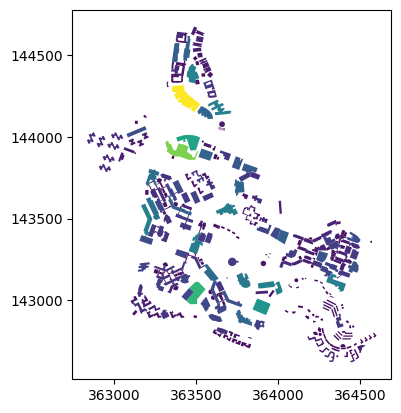

In [65]:
gdf_shape.plot(gdf_shape['geometry'].area)

In [66]:
gdf_shape["area"] = gdf_shape["geometry"].area

In [67]:
gdf_centroid = gpd.read_file(path_centroid)
gdf_centroid
gdf_centroid = gdf_centroid.drop(columns=["geometry"])

In [68]:
buildings = ["B1081", "B1082", "B1083", "B1295"]

In [69]:
# gdf_buildings = gdf_centroid[gdf_centroid["Name"].isin(buildings)]
# gdf_buildings = gdf_centroid.copy()

In [70]:
gdf_buildings = pd.concat([gdf_centroid, gdf_shape["area"]], axis=1)

In [71]:
export_dict = {
    "type": "FeatureCollection",
    "name": "UBEM_data_location",
    "crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } },
    "features": []
}

## Features that are relevant 
{
"Description": "SDE 1", 
"ID": "B1081", 
"Model": "City Energy Analyst - Base", 
"Reference": "Reference" 
"Type": "{Building Type from OSM}" }, 
"geometry": { "type": "Point", 
"coordinates": [ 103.771237, 1.300773, 32.732471466064453 ] }
 

In [72]:
gdf_buildings

,X,Y,Z,Name,REFERENCE,category,floors_ag,floors_bg,height_ag,height_bg,gh_height,area
0,103.7722882,1.296042136,66.5386,B1000,NUS - OED,yes,7,0,21,3,66.5386,2649.758539
1,103.7764344,1.299056708,24.86442,B1001,OSM - as it is,yes,3,0,9,3,24.86442,1648.777915
2,103.7725091,1.297544886,63.92968,B1002,OSM - as it is,yes,5,0,15,3,63.92968,2159.766393
3,103.7730649,1.29654873,64.01325,B1003,OSM - as it is,yes,7,0,21,3,64.01325,5359.353535
4,103.7748168,1.298462603,50.69537,B1004,OSM - as it is,yes,4,0,12,3,50.69537,5405.604260
...,...,...,...,...,...,...,...,...,...,...,...,...
357,103.7697235,1.292778,13.9,B1358,OSM - median values of all buildings,yes,1,1,3,3,13.9,509.344472
358,103.7702948,1.302559625,97.1,B1359,OSM - as it is,apartments,26,1,78,3,97.1,939.430585
359,103.7695684,1.302218325,99.8,B1360,OSM - as it is,apartments,26,1,78,3,99.8,939.431224
360,103.7827018,1.29670825,17.7,B1361,OSM - median values of all buildings,yes,1,1,3,3,17.7,119.063698


In [73]:


def create_dict_from_csv(row):

    return {
         "type": "Feature",
           "properties": {
        "Description": "Comparison of the default simulation for 2030 and a model with a reduced outdoor temperature of 1°C.", 
        "ID": row["Name"],
        "text": row["Name"],
        "Model": "City Energy Analyst - Base", 
        "Reference": row["REFERENCE"],
        "Type": row["category"], 
        "Floors" : row["floors_ag"],
        "Area": row["area"]
         },
        "geometry": { "type": "Point", 
                     "coordinates": [ float(row["X"]), float(row["Y"]), float(row["Z"]) ] }
    }



# Apply the function to each row in the DataFrame to create the list of dictionaries

export_dict["features"] = gdf_buildings.apply(create_dict_from_csv, axis=1).tolist()
export_dict



{'type': 'FeatureCollection',
 'name': 'UBEM_data_location',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'Description': 'Comparison of the default simulation for 2030 and a model with a reduced outdoor temperature of 1°C.',
    'ID': 'B1000',
    'text': 'B1000',
    'Model': 'City Energy Analyst - Base',
    'Reference': 'NUS - OED',
    'Type': 'yes',
    'Floors': '7',
    'Area': 2649.7585394439125},
   'geometry': {'type': 'Point',
    'coordinates': [103.7722882, 1.296042136, 66.5386]}},
  {'type': 'Feature',
   'properties': {'Description': 'Comparison of the default simulation for 2030 and a model with a reduced outdoor temperature of 1°C.',
    'ID': 'B1001',
    'text': 'B1001',
    'Model': 'City Energy Analyst - Base',
    'Reference': 'OSM - as it is',
    'Type': 'yes',
    'Floors': '3',
    'Area': 1648.7779146338385},
   'geometry': {'type': 'Point',
    'coordinates': [103.776

In [74]:
dt_path = os.path.join(path_dt_project, 'assets/UBEM_data_location.json')
with open(dt_path, "w") as f:
    json.dump(export_dict, f, indent=2)